#  Automobile Price Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv (r'C:\Users\Gaurav\Desktop\Raj\ML pro\2\AutoData (1).csv')
df.head(10)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
df.shape

(205, 25)

# Basic EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [4]:
df.doornumber[df.doornumber=="two"]=2    #converting Doornumbers into Numericals
df.doornumber[df.doornumber=="four"]=4
df['doornumber']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: object

In [5]:
df['doornumber']=df['doornumber'].astype(str).astype(int) #changing data type of 'doornumber'
df['doornumber']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int32

In [6]:
df.cylindernumber[df.cylindernumber=="eight"]=8  #converting Cylindernumber into Numericals
df.cylindernumber[df.cylindernumber=="four"]=4
df.cylindernumber[df.cylindernumber=="six"]=6
df.cylindernumber[df.cylindernumber=="five"]=5
df.cylindernumber[df.cylindernumber=="three"]=3
df.cylindernumber[df.cylindernumber=="two"]=2
df.cylindernumber[df.cylindernumber=="twelve"]=12
df.cylindernumber=df.cylindernumber.astype(str).astype(int) #changing data type of 'cylindernumber'
df.cylindernumber

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int32

#  data cleanup

In [7]:
from sklearn import preprocessing #Creating object of LabelEncoder, labelencoder converts object to int
le=preprocessing.LabelEncoder() 
df.fueltype = le.fit_transform(df.fueltype)
df.aspiration = le.fit_transform(df.aspiration)
df.carbody = le.fit_transform(df.carbody)
df.drivewheel = le.fit_transform(df.drivewheel)
df.enginelocation = le.fit_transform(df.enginelocation)
df.enginetype = le.fit_transform(df.enginetype)
df.fuelsystem = le.fit_transform(df.fuelsystem)


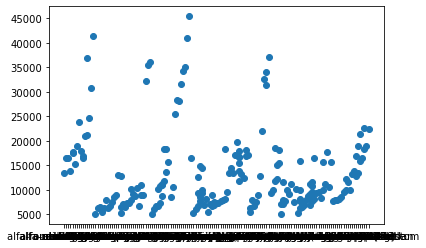

In [8]:
plt.scatter(df['make'],df['price'])# price dont vary with brand so need to convert 'make' into int
plt.show()

In [9]:
x2=df.drop(['price'],axis=1)
x1=x2.drop(['make'],axis=1)
y1=df['price']

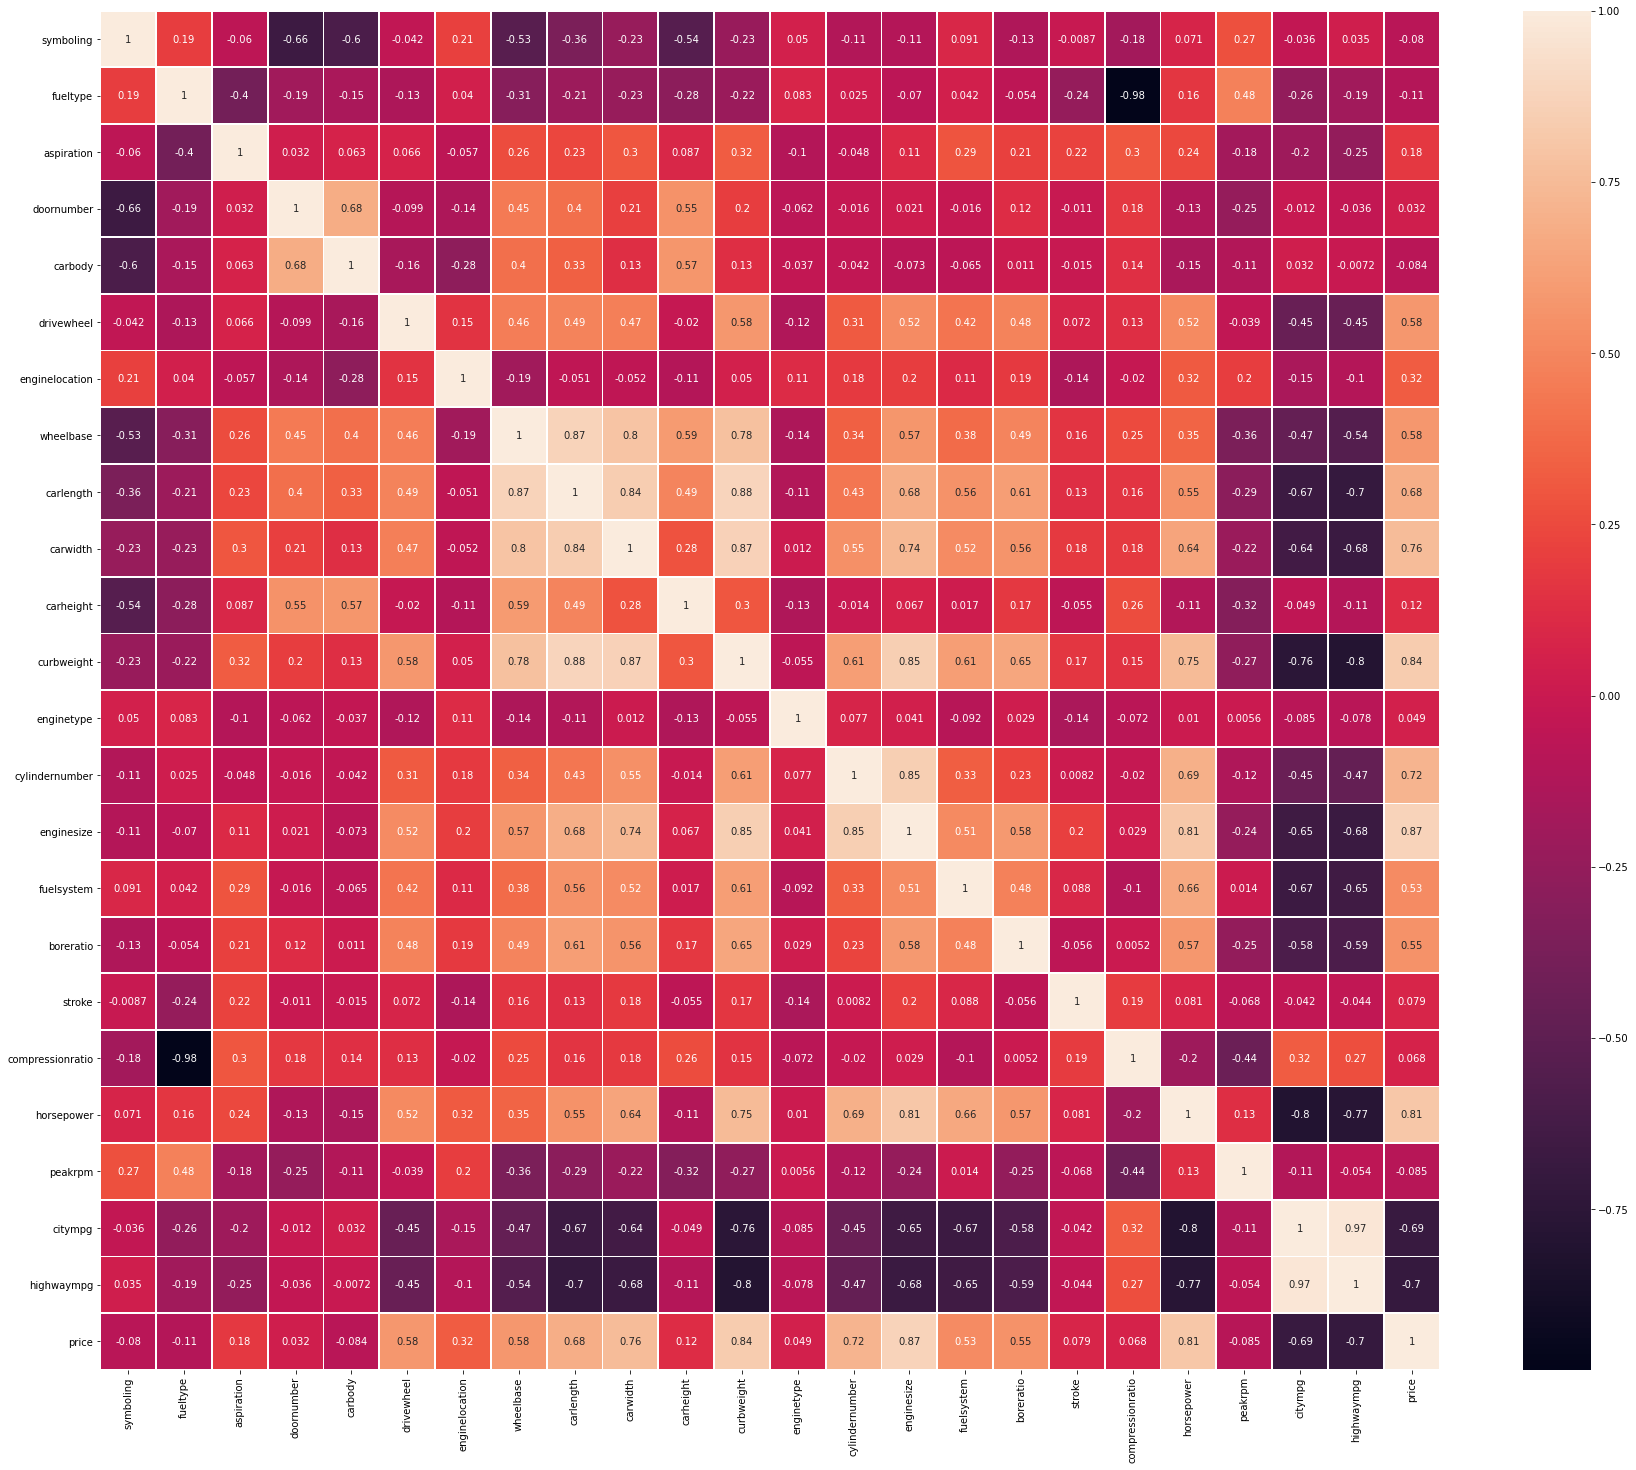

In [11]:
plt.figure(figsize=(30,25)) #to find best correlation for building simple regression with target value
sns.heatmap(df.corr(),annot=True,linewidths=0.8)
plt.show()

In [12]:
#from above plot we can say that "enginesize" best fit variable for simple linear reg.

In [13]:
df.dtypes # all required variables are converted into int

symboling             int64
make                 object
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [14]:
y=df['price'].values

In [17]:
x=df[['enginesize']].values #most correlated parameter from heat map

# train test split 

In [25]:
from sklearn.model_selection import train_test_split # model using best variable 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
tr=lr.fit(x,y)

In [27]:
ypp=lr.predict(x)

#  R2 

In [29]:
from sklearn.metrics import r2_score #r2
r2 = r2_score(ypp, y)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.6913206771281898


# feature selection approaches 

In [30]:
from sklearn.feature_selection import RFE

In [33]:
rfe=RFE(lr,15)#to get top 15 correlated parameters

In [34]:
fit_rfe=rfe.fit(x1,y1)

In [35]:
fit_rfe.n_features_

15

In [36]:
fit_rfe.support_

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False, False,  True, False])

In [37]:
x1.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [38]:
fit_rfe.ranking_

array([5, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 8, 3, 1, 1, 2, 1, 1, 1, 6, 9, 1,
       7])

In [39]:
feature_weights_RFE=dict(zip(x1.columns,fit_rfe.ranking_))
feature_weights_RFE

{'symboling': 5,
 'fueltype': 1,
 'aspiration': 1,
 'doornumber': 1,
 'carbody': 1,
 'drivewheel': 1,
 'enginelocation': 1,
 'wheelbase': 4,
 'carlength': 1,
 'carwidth': 1,
 'carheight': 1,
 'curbweight': 8,
 'enginetype': 3,
 'cylindernumber': 1,
 'enginesize': 1,
 'fuelsystem': 2,
 'boreratio': 1,
 'stroke': 1,
 'compressionratio': 1,
 'horsepower': 6,
 'peakrpm': 9,
 'citympg': 1,
 'highwaympg': 7}

In [40]:
selected_features=fit_rfe.transform(x1)

In [44]:
print(selected_features[0:5,:])

[[  1.     0.     2.     0.     2.     0.   168.8   64.1   48.8    4.
  130.     3.47   2.68   9.    21.  ]
 [  1.     0.     2.     0.     2.     0.   168.8   64.1   48.8    4.
  130.     3.47   2.68   9.    21.  ]
 [  1.     0.     2.     2.     2.     0.   171.2   65.5   52.4    6.
  152.     2.68   3.47   9.    19.  ]
 [  1.     0.     4.     3.     1.     0.   176.6   66.2   54.3    4.
  109.     3.19   3.4   10.    24.  ]
 [  1.     0.     4.     3.     0.     0.   176.6   66.4   54.3    5.
  136.     3.19   3.4    8.    18.  ]]


#  Interpretable  Model

In [45]:
x_train_rfe,x_test_rfe,y_train_rfe,y_test_rfe=train_test_split(selected_features,y1,test_size=0.30,random_state=100)

In [46]:
l_rfe=LinearRegression()
l_rfe.fit(x_train_rfe,y_train_rfe)
l_pre=l_rfe.predict(x_test_rfe)

In [47]:
from sklearn.metrics import r2_score #r2
r3 = r2_score(y_test_rfe,l_pre)
print('r2 score for model is', r3)

r2 score for model is 0.8536684302168603


In [48]:
# plot of 4 most correlated parameters

In [49]:
x_tr=pd.DataFrame(x_train_rfe)

In [50]:
from lime.lime_tabular import LimeTabularExplainer

In [51]:
explainer = LimeTabularExplainer(x_tr.values, mode="regression", feature_names=x_tr.columns)


In [52]:
i = 10
X_observation = x_tr.iloc[[i], :]
l_rfe.predict(X_observation)[0]

6295.14920823057

In [53]:
explanation = explainer.explain_instance(X_observation.values[0], l_rfe.predict)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

0.39754297898294644


In [54]:
#feaure 6 is most fit varible that drives price

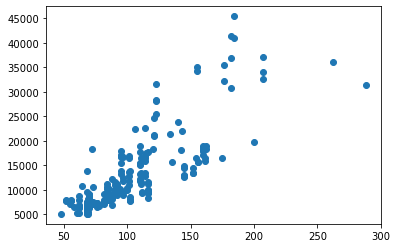

In [55]:
plt.scatter(df['horsepower'],df['price'])
plt.show()

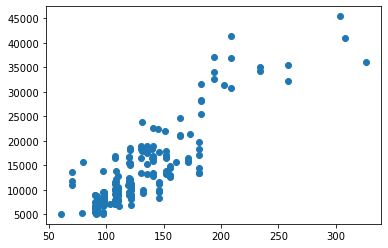

In [56]:
plt.scatter(df['enginesize'],df['price'])
plt.show() # fom this plot we can this almost increased linealy hence price depends on 'enginesize'

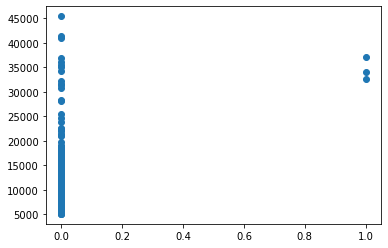

In [57]:
plt.scatter(df['enginelocation'],df['price'])
plt.show()

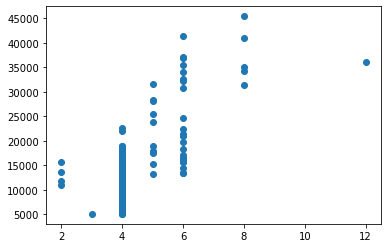

In [58]:
plt.scatter(df['cylindernumber'],df['price'])
plt.show()

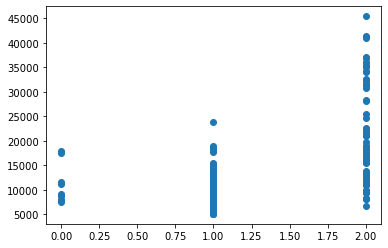

In [59]:
plt.scatter(df['drivewheel'],df['price'])
plt.show()

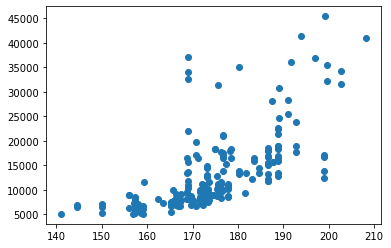

In [60]:
plt.scatter(df['carlength'],df['price'])
plt.show()

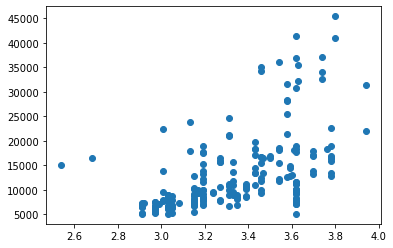

In [61]:
plt.scatter(df['boreratio'],df['price'])
plt.show()